In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob
from wordcloud import WordCloud
import plotly.graph_objects as go
import plotly.express as px
import json
import osaw
import tweepy
import pandas as pd
import re
import string

ModuleNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls '/content/drive/My Drive/Colab Notebooks/credentials.json'
credentials = '/content/drive/My Drive/Colab Notebooks/credentials.json'

Mounted at /content/drive
'/content/drive/My Drive/Colab Notebooks/credentials.json'


In [ ]:
#accessing credentials file to scrape twitter API
with open(credentials) as cred_data:
        info = json.load(cred_data)
        consumer_key = info['CONSUMER_KEY']
        consumer_secret = info['CONSUMER_SECRET']
        access_key = info['ACCESS_KEY']
        access_secret = info['ACCESS_SECRET']
        #google_api = info['GOOGLE_API']
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
search_words = ["realDonaldTrump"]
search_words1 =["JoeBiden"]
date_since = '2020-11-03'

In [ ]:
#using tweepy.Cursor to format dataframe
tweets = tweepy.Cursor(
   api.search,
   q = search_words1,
   lang = 'en',
   since = date_since,
   tweet_mode='extended' #attempt to retrieve full_text from truncated tweets
).items(2500)

tweet_details = [[tweet.full_text, tweet.user.screen_name, tweet.user.location] for tweet in tweets]
Biden_Reviews = pd.DataFrame(data=tweet_details, columns=['text','user','location'])

#pd.set_option('max_colwidth',800)
Biden_Reviews.head()

,text,user,location
0,RT @TimFullerton: Here is Joe Biden ending Rud...,nononsense4ver,
1,RT @KatiePavlich: Lori Lightfoot Defends Atten...,MorningAnswer,"Chicago, IL"
2,@Betracingnation @jaketapper Joe Biden should ...,ReneeMessant,
3,RT @joncoopertweets: A Michigan state judge ha...,Sundaysrealtalk,
4,Such an obvious choice--you get what you pay f...,OldWhiteGal1,"Colorado, USA"


In [ ]:
Trump_reviews = tweet_df1
Biden_reviews = Biden_Reviews

In [ ]:
Trump_reviews.to_csv('trump.csv')

In [ ]:
Biden_reviews.to_csv('biden.csv')

In [ ]:
#Visualizing text
Trump_reviews['text'][10]
Biden_reviews['text'][10]

# Finding sentiments using TextBlob
text_blob_object1 = TextBlob(Trump_reviews['text'][10])
print(text_blob_object1.sentiment)
text_blob_object2 = TextBlob(Biden_reviews['text'][500])
print(text_blob_object2.sentiment)

# Sentence  with zero polarity and subjectivity
text_blob_object2 = TextBlob(Biden_reviews['text'][100])
print(text_blob_object2.sentiment)

Sentiment(polarity=0.0, subjectivity=0.75)
Sentiment(polarity=0.4, subjectivity=0.2)
Sentiment(polarity=0.0, subjectivity=0.0)


In [ ]:
# Donald Trump
def find_pol(review):
    return TextBlob(review).sentiment.polarity

Trump_reviews['Sentiment_Polarity'] = Trump_reviews['text'].apply(find_pol)
Trump_reviews.tail()

# Joe Biden
def find_pol(review):
    return TextBlob(review).sentiment.polarity

Biden_reviews['Sentiment_Polarity'] = Biden_reviews['text'].apply(find_pol)
Biden_reviews.tail()
      

,text,user,location,Sentiment_Polarity,Expression Label
2490,RT @kylegriffin1: President-elect Joe Biden's ...,BlueCombo,,-0.15,negative
2494,RT @umairh: Congrats to Joe Biden for winning ...,Mamaw30,,0.25,positive
2495,"RT @RBReich: Thanks to communities of color, J...",basstina1,,0.20,positive
2497,"RT @Nate_Cohn: It's final: Joe Biden 306, Dona...",missesoxclusive,Illinois,0.20,positive
2498,"RT @CNN: ""It's tempting to say that President ...",Rosy1Wl,,-0.30,negative


In [ ]:
# Adding one more attribute for Expression Label
# Donald Trump
Trump_reviews['Expression Label'] = np.where(Trump_reviews['Sentiment_Polarity']>0,'positive', 'negative')
Trump_reviews['Expression Label'][Trump_reviews.Sentiment_Polarity ==0] = "Neutral"
Trump_reviews.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,text,user,location,Sentiment_Polarity,Expression Label
2491,RT @WhiteHouse: LIVE: President @realDonaldTru...,Carlar01,RI. USA by way of Sicily,0.136364,positive
2494,@essarr @LilNardo21 @KellyTu67700063 @realDona...,DominicCGiorda2,,0.215833,positive
2496,@Chase2929 @jimrutenberg @realDonaldTrump @Tuc...,steveaustin1971,Earth,0.162500,positive
2498,@jamesfloodiii @ClimateAudit @SidneyPowell1 @r...,BlkOps6,S/V Grateful Aire,-0.050000,negative
2499,@BrianKarem @realDonaldTrump I heard this and ...,katiebrimmer,"Los Angeles, CA",0.204167,positive


In [ ]:
# Joe Biden
Biden_reviews['Expression Label'] = np.where(Biden_reviews['Sentiment_Polarity']>0,'positive', 'negative')
Biden_reviews['Expression Label'][Biden_reviews.Sentiment_Polarity ==0] = "Neutral"
Biden_reviews.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,text,user,location,Sentiment_Polarity,Expression Label
2490,RT @kylegriffin1: President-elect Joe Biden's ...,BlueCombo,,-0.15,negative
2494,RT @umairh: Congrats to Joe Biden for winning ...,Mamaw30,,0.25,positive
2495,"RT @RBReich: Thanks to communities of color, J...",basstina1,,0.20,positive
2497,"RT @Nate_Cohn: It's final: Joe Biden 306, Dona...",missesoxclusive,Illinois,0.20,positive
2498,"RT @CNN: ""It's tempting to say that President ...",Rosy1Wl,,-0.30,negative


In [ ]:
# Analyzing Positive, Negative and Neutral replies on Trump's tweets.     
new1 = Trump_reviews.groupby('Expression Label').count()
x = list(new1['Sentiment_Polarity'])
y = list(new1.index)
tuple_list = list(zip(x,y))
df = pd.DataFrame(tuple_list, columns=['x','y'])
df['color'] = 'blue'
df['color'][1] = 'red'
df['color'][2] = 'green'
fig = go.Figure(go.Bar(x=df['x'],
                y=df['y'],
                orientation ='h',
                marker={'color': df['color']}))
fig.update_layout(title_text='Trump\'s Reviews Analysis' )
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Analyzing Positive, Negative and Neutral replies on Biden's tweets
new2 = Biden_reviews.groupby('Expression Label').count()
x = list(new2['Sentiment_Polarity'])
y = list(new2.index)
tuple_list = list(zip(x,y))
df = pd.DataFrame(tuple_list, columns=['x','y'])
df['color'] = 'blue'
df['color'][1] = 'red'
df['color'][2] = 'green'
fig = go.Figure(go.Bar(x=df['x'],
                y=df['y'],
                orientation ='h',
                marker={'color': df['color']}))
fig.update_layout(title_text='Biden\'s Reviews Analysis' )
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Dropping all the statements having zero polarity

# Donald Trump      
reviews1 = Trump_reviews[Trump_reviews['Sentiment_Polarity'] == 0.0000]
reviews1.shape
cond1 = Trump_reviews['Sentiment_Polarity'].isin(reviews1['Sentiment_Polarity'])
Trump_reviews.drop(Trump_reviews[cond1].index, inplace = True)
Trump_reviews.shape 

(1388, 5)

In [ ]:
# Joe Biden      
reviews2 = Biden_reviews[Biden_reviews['Sentiment_Polarity'] == 0.0000]
reviews2.shape
cond2 = Biden_reviews['Sentiment_Polarity'].isin(reviews1['Sentiment_Polarity'])
Biden_reviews.drop(Biden_reviews[cond2].index, inplace = True)
Biden_reviews.shape

# Let's make both the datasets balanced now. So we will just take 1000 rows from both datasets and drop rest of them.

(1772, 5)

In [ ]:
# Donald Trump      
np.random.seed(10)
remove_n =324
drop_indices = np.random.choice(Trump_reviews.index, remove_n, replace=False)
df_subset_trump = Trump_reviews.drop(drop_indices)
df_subset_trump.shape

(1064, 5)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



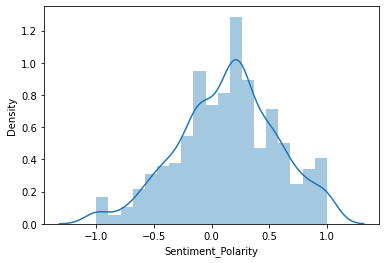

In [ ]:
# Joe biden            
np.random.seed(10)
remove_n =31
drop_indices = np.random.choice(Biden_reviews.index, remove_n, replace=False)
df_subset_biden = Biden_reviews.drop(drop_indices)
df_subset_biden.shape
 
# Data Visualiization

# Donald Trump      
sns.distplot(df_subset_trump['Sentiment_Polarity'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



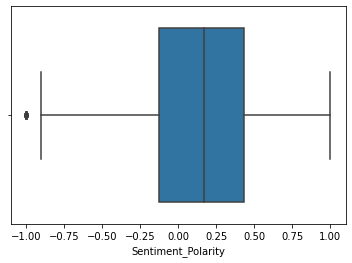

In [ ]:
sns.boxplot(df_subset_trump['Sentiment_Polarity'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



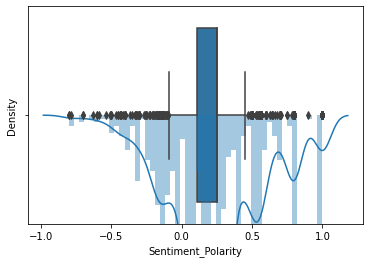

In [ ]:
# Joe Biden      
sns.distplot(df_subset_biden['Sentiment_Polarity'])
sns.boxplot(df_subset_biden['Sentiment_Polarity'])
plt.show()

In [ ]:
# Percentage count for Donald Trump
count_1 = df_subset_trump.groupby('Expression Label').count()
print(count_1)
negative_per1 = (count_1['Sentiment_Polarity'][0]/1000)*100
positive_per1 = (count_1['Sentiment_Polarity'][1]/1000)*100

# Percentage count for Joe Biden      
count_2 = df_subset_biden.groupby('Expression Label').count()
print(count_2)
negative_per2 = (count_2['Sentiment_Polarity'][0]/1000)*100
positive_per2 = (count_2['Sentiment_Polarity'][1]/1000)*100

                  text  user  location  Sentiment_Polarity
Expression Label                                          
negative           387   387       387                 387
positive           677   677       677                 677
                  text  user  location  Sentiment_Polarity
Expression Label                                          
negative           232   232       232                 232
positive          1509  1509      1509                1509


In [ ]:
# Analysis of Positive and Negative comments on both the handle

Politicians = ['Donald Trump', 'Joe Biden']
lis_pos = [positive_per1, positive_per2]
lis_neg = [negative_per1, negative_per2]

fig = go.Figure(data=[
    go.Bar(name='Positive', x=Politicians, y=lis_pos),
    go.Bar(name='Negative', x=Politicians, y=lis_neg)
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [ ]:
# Most Positive and Most Negative comments on both the Twitter handles

# Donald Trump
# Most positive replies      
most_positive1 = df_subset_trump[df_subset_trump.Sentiment_Polarity == 1].text.head()
pos_txt1 = list(most_positive1)
pos1 = df_subset_trump[df_subset_trump.Sentiment_Polarity == 1].Sentiment_Polarity.head()
pos_pol1 = list(pos1)
fig = go.Figure(data=[go.Table(columnorder = [1,2], 
                               columnwidth = [50,400],
                               header=dict(values=['Polarity','Positive Trump Tweets'],
                               fill_color='turquoise',
                               align='left'),
               cells=dict(values=[pos_pol1, pos_txt1],
                               fill_color='white',
                               align='left'))])
 
fig.show()

In [ ]:
# Most Negative Replies      
most_negative1 = df_subset_trump[df_subset_trump.Sentiment_Polarity == -1].text.head()
neg_txt1 = list(most_negative1)
neg1 = df_subset_trump[df_subset_trump.Sentiment_Polarity == -1].Sentiment_Polarity.head()
neg_pol1 = list(neg1)
fig = go.Figure(data=[go.Table(columnorder = [1,2],
                               columnwidth = [50,400],
                               header=dict(values=['Polarity','Negative Trump Replies'],
                               fill_color='turquoise',
                               align='left'),
                cells=dict(values=[neg_pol1, neg_txt1],
                           fill_color='white',
                           align='left'))])

fig.show()

In [ ]:
# Joe Biden
# Most Positive replies      
most_positive2 = df_subset_biden[df_subset_biden.Sentiment_Polarity == 1].text.tail()
pos_txt2 = list(most_positive2)
pos2 = df_subset_biden[df_subset_biden.Sentiment_Polarity == 1].Sentiment_Polarity.tail()
pos_pol2 = list(pos2)
fig = go.Figure(data=[go.Table(columnorder = [1,2],
                               columnwidth = [50,400],
                               header=dict(values=['Polarity','Most Positive Biden Tweets'],
                               fill_color='turquoise',
                               align='left'),
                cells=dict(values=[pos_pol2, pos_txt2],
                           fill_color='white',
                           align='left'))])

fig.show()

In [ ]:
most_negative2

Series([], Name: text, dtype: object)

In [ ]:
# Most negative replies
most_negative2 = df_subset_biden[df_subset_biden.Sentiment_Polarity == -0.8].text.head()
neg_txt2 = list(most_negative2)
neg2 = df_subset_biden[df_subset_biden.Sentiment_Polarity == -1].Sentiment_Polarity.head()
neg_pol2 = list(neg2)
fig = go.Figure(data=[go.Table(columnorder = [1,2],
                               columnwidth = [50,400],
                               header=dict(values=['Polarity','Most Negative Replies on Biden\'s handle'],
                               fill_color='turquoise',
                               align='left'),
                cells=dict(values=[neg_pol2, neg_txt2],
                           fill_color='white',
                           align='left'))])

fig.show()

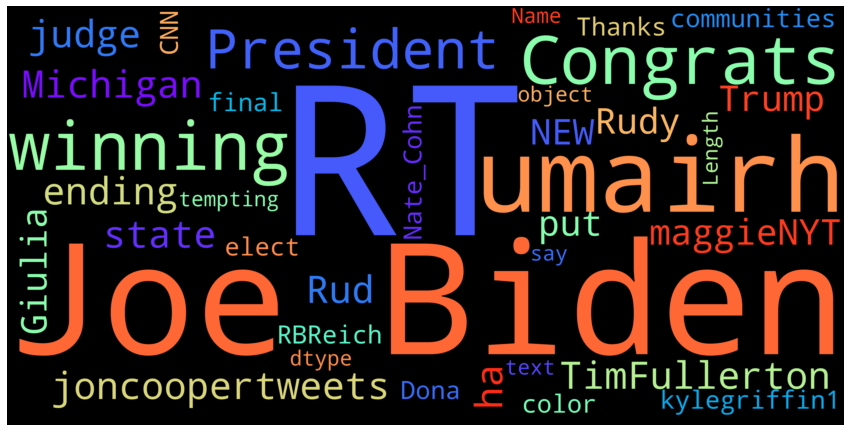

In [ ]:
# WordCloud for Donald Trump      
# Start with one review:
text = str(df_subset_biden.text)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=100, max_words=500, scale=10, relative_scaling=.6, background_color="black", colormap = "rainbow").generate(text)
# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

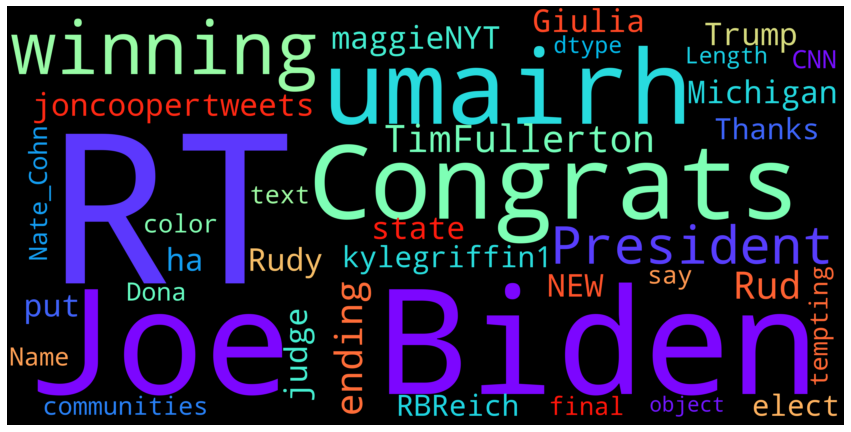

In [ ]:
# WordCloud for Joe Biden      
# Start with one review:
text = str(Biden_reviews.text)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=100, max_words=500,scale=10,relative_scaling=.6,background_color="black", colormap = "rainbow").generate(text)
# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

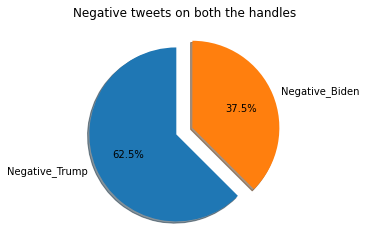

In [ ]:
# Comparison between negative comments on both      
labels =  ['Negative_Trump', 'Negative_Biden'] 
sizes = lis_neg
explode = (0.1, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle=90)
ax1.set_title('Negative tweets on both the handles')
plt.show()

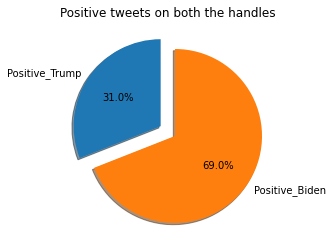

In [ ]:
# Comparison between Positive comments on both      
labels =  ['Positive_Trump', 'Positive_Biden'] 
sizes = lis_pos
explode = (0.1, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle=90)
ax1.set_title('Positive tweets on both the handles')
plt.show()